## Введение в анализ данных, ИАД-2

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №2

Задание выполнил(а): _Пучкова Арина_

### Общая информация

__Дата выдачи:__ 04.03.2020

__Дедлайн:__ 23:59 17.03.2020

### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
\text{points} \times 10 / 16,
$$

где points — количество баллов за обязательную часть, которое вы набрали. Максимальное число баллов, которое можно получить за обязательную часть — 16, а максимальное число дополнительных баллов, которые пойдут в бонус — 2 (в бонус идет только целое число баллов). Бонусные задания отмечены звездочками (*).

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Инвайт для группы ИАД-6: rd5CNrr

Перед отправкой перезагрузите ноутбук и проверьте, что все ячейки могут быть последовательно выполнены. Ноутбук должен запускаться с использованием python 3.6+

# kNN своими руками (5 баллов)

In [1]:
import numpy as np

### Реализуйте две функции расстояния (1 балл)
- Евклидова метрика
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(0.5 балла)}
$$
- метрика Манхэттена
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(0.5 балла)}
$$
Обе функции должны на вход получать матрицу `np.array of shape(n, m)` и вектор `np.array of shape(m, )`, а возвращать вектор расстояний от каждой строчки матрицы до вектора `np.array of shape(n, )`

**В данном пункте запрещено использование циклов for, while. Пользуйтесь возможностями numpy.** 

In [2]:
def euclidian_metric(X, x):
    distances = np.sqrt(np.sum((X - x.T)**2, axis = 1))
    return distances

In [3]:
def manhattan_metric(X, x):
    distances = np.sum(np.abs(X - x.T), axis = 1)
    return distances

In [4]:
X = np.array([[1, 2, 3], [5, 6, 7], [8, 9, 10]])
y = np.ones(3)

In [5]:
assert np.allclose(euclidian_metric(X, y), np.array([ 2.23606798,  8.77496439, 13.92838828]))

In [6]:
assert np.allclose(manhattan_metric(X, y), np.array([ 3., 15., 24.]))

### Реализуйте алгоритм kNN для регрессии (4 балла)

Реализуйте взвешенный алгоритм kNN для регрессии. Пусть нам нужно вычислить значение $y$ для некоторого $x$ при известных данных $\left(x_1, y_1\right), \ldots, \left(x_\ell, y_\ell\right)$. Предсказанием вашего регрессора будет являться

$$
\hat{y} = \frac{\sum\limits_{i=1}^kw_iy_{(i)}}{\sum\limits_{i=1}^kw_i},
$$
где $\left(x_{(1)}, y_{(1)}\right), \ldots, \left(x_{(k)}, y_{(k)}\right)$ - ближайшие $k$ объектов к $x$ по некоторой метрике $d(\cdot, \cdot)$. Ваш алгоритм должен уметь работать с двумя метриками:

$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(евклидова)}
$$
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(манхэттена)}
$$

- Реалиуйте данный класс для равномерных весов (то есть $w_i = \frac{1}{k}$) (__3 балла__)
- Реалиуйте возможность передать данному классу параметр `weights='distance'`, чтобы реализовывался взвешенный алгоритм kNN с весами, обратными расстояниям (то есть $w_i = \frac{1}{d\left(x, x_{(i)}\right)}$, где $d(x, y)$ - функция расстояния) (__1 балл__)

В данном классе должны быть реализованы методы `.fit` и `.predict`. Однако, для удобства может оказаться полезным реализовать еще некоторые вспомогательные методы, например, функции расстояния.

In [7]:
class KNN:
    def __init__(self, metric='euclid', k=5, weights='uniform'):
        """
        PARAMETERS:
        metric ('euclid' or 'manhattan')
        k - number of nearest neighbors
        """
        
        self.metric = metric
        self.k = k
        self.weights = weights
        
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (l, d)
        y_train - np.array of shape (l,)
        """
        self.X_train = X_train
        self.y_train = y_train
        
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        self.X_test = X_test
        
        def metrics(x_train, x, metric):
            if self.metric == "euclid": 
                distances = np.sqrt(((x_train - x)**2).sum())
                return distances 
            if self.metric == "manhattan": 
                distances = np.sum(np.abs(x_train - x))
                return distances 
        def _yhat(x, X_train, y_train, k, weights): 
            distances = []
            for index in range(len(X_train)):
                dist = metrics(X_train[index], x, self.metric)
                distances.append(dist)
        
            distances = np.array(distances)
            neighbors = np.argsort(distances)[:k]
    
            lables = [y_train[i] for i in neighbors]
        
            if self.weights == "uniform": 
                return np.sum(lables)/ k
            elif self.weights == "distance": 
                d = [distances[i] for i in neighbors]
                return sum((1/d[i])*lables[i] for i in range(k)) / sum(1/d[i] for i in range(k))
    
        y_pred = np.array([_yhat(x, self.X_train, self.y_train, self.k, self.weights) for x in X_test]) 
        return y_pred
            

#### Проверим, что наш knn и соответствующий knn из sklearn выдает одинаковые (ну, или почти одинаковые) результаты.

In [8]:
from sklearn.neighbors import KNeighborsRegressor

In [9]:
np.random.seed(17032019)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)

In [10]:
#небольшие данные для проверки всякого

X_train = np.array([[1, 2, 3], [7, 8, 9], [2, 10, 3], [3, 6, 9], [9, 2, 5], [1, 3, 9], [2, 8, 4], [6, 1, 7]])
y_train = np.array([2, 3, 3, 2, 2, 1, 3, 2]) 
X_test = np.array([[7, 8, 10], [2, 2, 3]])
knn = KNN(metric='manhattan', weights = "distance")
knn.fit(X_train, y_train)
knn.predict(X_test)

array([2.71560338, 2.09498681])

In [11]:
sknn = KNeighborsRegressor(p=1, weights='distance')
sknn.fit(X_train, y_train)
sknn.predict(X_test)

array([2.71560338, 2.09498681])

- Проверка для евклидовой метрики

In [12]:
knn = KNN(metric='euclid')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=2, weights='uniform')
sknn.fit(X_train, y_train)

assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

- Проверка для манхэттенской метрики

In [13]:
knn = KNN(metric='manhattan')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=1, weights='uniform')
sknn.fit(X_train, y_train)

assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

- Проверка для взвешенных весов

In [14]:
knn = KNN(metric='euclid', weights='distance')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=2, weights='distance')
sknn.fit(X_train, y_train)

assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

In [15]:
knn = KNN(metric='manhattan', weights='distance')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=1, weights='distance')
sknn.fit(X_train, y_train)

assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

# Линейная регрессия своими руками (5 баллов)

Реализуйте линейную регрессию с градиентным спуском для [функции потерь Хьюбера](https://en.wikipedia.org/wiki/Huber_loss):

$$
L_\delta\left(y, \hat{y}\right) =
\begin{cases}
\frac{1}{2}\left(y - \hat{y}\right)^2, \qquad &|y - \hat{y}| \leq \delta\\
\delta\left|y - \hat{y}\right| - \frac{1}{2}\delta^2,\qquad & \text{otherwise}
\end{cases}
$$

В таком случае общее значение функции потерь на всем датасете $(x_1, y_1), \ldots, (x_\ell, y_\ell)$ будет равно

$$
L = \frac{1}{\ell}\sum\limits_{i=1}^\ell L_\delta\left(y_i, \hat{y}_i\right)
$$

Чему будет равна производная данной функции по $\hat{y}$?

__Вспомните, что такое вектор $\hat{y}$? Как он зависит от $X$ и $w$?__

Проверьте работу вашего метода: выведите результаты его работы на той же искусственной выборке, что и в задаче выше (в качестве метрик качества используйте MSE и Huber loss). Постройте график зависимости значения функции потерь от итерации градиентного спуска.

*Вы можете опустить единичный признак в модели и не добавлять его в данные. Для данной искусственной выборки это не актуально, потому что целевая переменная в этом случае является случайной величиной из стандартного нормального распределения со средним 0.*

*Вектор весов в градиентном спуске можете инициализировать нулями.*

Эти ссылки могут показаться вам полезными:
- https://github.com/esokolov/ml-course-hse/blob/master/2019-fall/lecture-notes/lecture02-linregr.pdf
- https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
- https://stats.stackexchange.com/questions/312737/mean-absolute-error-mae-derivative

In [16]:
import matplotlib.pyplot as plt

%matplotlib inline

### Реализуйте функцию потерь Хьюбера для одного примера и ее градиент по весам (1 балл)

In [17]:
def huber_loss(x, y, w, delta):
    """
    x - np.array shape=(d,)
    y - scalar
    w - np.array shape=(d,)
    delta - scalar
    
    OUTPUT:
    loss - scalar
    """
    y_hat = x.T@w.T
    if np.abs(y - y_hat) <= delta: 
        loss = 0.5*((y - y_hat)**2)
    else: 
        loss = delta*np.abs(y - y_hat) - 0.5*(delta**2)
    return loss 
        

def huber_grad(x, y, w, delta):
    """
    INPUT:
    x - np.array shape=(d,)
    y - scalar
    w - np.array shape=(d,)
    delta - scalar
    
    OUTPUT:
    grad - np.array shape=(d,)
    """
    y_hat = w@x
    if np.abs(y - y_hat) <= delta:
        weights_deriv = -x*(y-y_hat)
    else: 
        weights_deriv = np.sign(y - y_hat)*delta*(-x)
    m = weights_deriv
    return m

Небольшие проверки для вашего удобства

In [18]:
x = np.array([1, 2, 3])
w = np.array([3, 5, 12])
y = 19
delta = 1

assert huber_loss(x, y, w, delta) == 29.5
assert np.allclose(huber_grad(x, y, w, delta), np.array([1, 2, 3]))

In [19]:
x = np.array([1, 2, 3])
w = np.array([3, 5, 12])
y = 49.2
delta = 1

assert np.allclose(huber_loss(x, y, w, delta), 0.02000000000000057)
assert np.allclose(huber_grad(x, y, w, delta), np.array([-0.2, -0.4, -0.6]))

Так будет выглядеть график нашей функции потерь. Можете (это не обязательное требование) проверить, что ваш результат будет выглядеть так же.

### А теперь уже и саму линейную регрессию (4 балла)

In [25]:
class LinearRegressionHuber:
    def __init__(self, delta=1.0, max_iter=1000, tol=1e-6, eta=1e-2):
        """
        PARAMETERS:
        delta - scalar in Huber loss
        max_iter - maximum possible number of iterations in Gradient Descent
        tol - precision for stopping criterion in Gradient Descent
        eta - step size in Gradient Descent (learning rate)
        """
        
        self.delta = delta
        self.max_iter = max_iter
        self.tol = tol
        self.eta = eta
        
        self.w = None
        self.loss_history = None
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (l, d)
        y_train - np.array of shape (l,)
        
        В этой функции вы должны инициализировать веса нулями, а также 
        итерационно обновлять веса с помощью 
        градиентного спуска (считать и запоминать лосс на каждой итерации тоже будет неплохо)
        """
        self.w = np.array([0 for i in range(X_train.shape[1])])
        self.loss_history = []
        previous_w = 0
        for i in range(self.max_iter): 
            previous_w = self.w
            self.w = self.w - self.eta*self.calc_gradient(X_train, y_train)
            self.loss_history.append(self.calc_loss(X_train, y_train))
            if np.abs(np.sum(self.w - previous_w)) > self.tol: 
                continue 
        return self.loss_history
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        
        Просто предсказать ответы с помощью обученных весов
        """
        
        y_pred = X_test@self.w

        return y_pred
    
    def calc_gradient(self, X, y):
        """
        Calculates the gradient of Huber loss by weights.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        grad - np.array of shape (d,)
        
        Посчитайте градиент как среднее от градиентов для каждого примера
        """
        grad = np.zeros_like(self.w)
        
        grad = [huber_grad(X[index], y[index], self.w, self.delta) for index in range(X_train.shape[0])]
        grad = np.array([np.mean(grad, axis = 0)])
        
        return grad 
    
    def calc_loss(self, X, y):
        """
        Calculates the Huber loss.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        loss - float
        
        Посчитайте loss по выборке как сумма loss'ов для каждого 
        примера, поделить на размер выборки
        
        """
        loss = 0 
        N = len(X)
        loss = np.mean([huber_loss(X[i], y[i], self.w, self.delta) for i in range(N)])
        
        return loss

In [26]:
np.random.seed(17032019)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)
delta = 1

In [27]:
lr = LinearRegressionHuber()

In [29]:
loss_history = lr.fit(X_train, y_train)

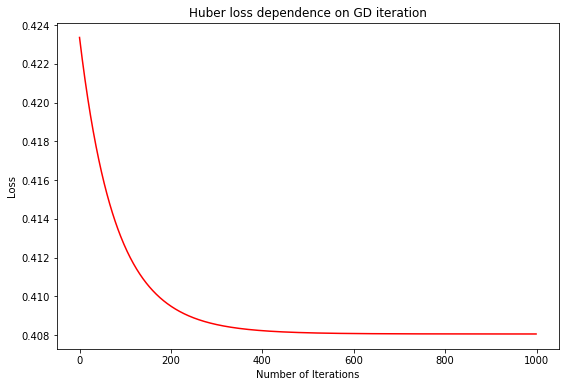

In [30]:
fig = plt.figure(figsize = (9, 6))
ax = plt.plot(range(len(loss_history)), loss_history, 'r') 

plt.title("Huber loss dependence on GD iteration")
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

### 

Постройте график зависимости функции потерь от итерации

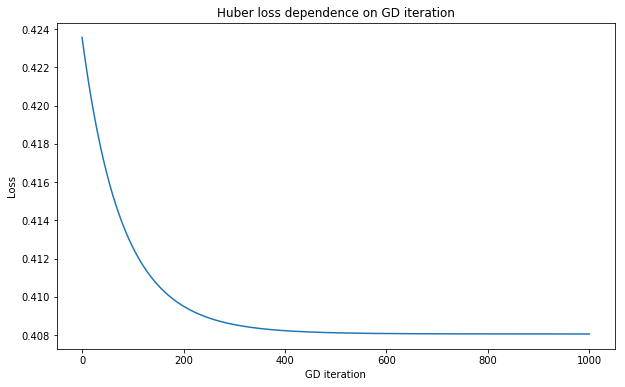

In [372]:
# your code here

# Практика (7 баллов)

Пожалуйста, при использовании различных функций из библиотек импортируйте все, что вам понадобилось в данной части, в следующем блоке:

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.linear_model import RidgeCV, LassoCV

%matplotlib inline

В этом домашнем задании вы поработаете с данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

In [32]:
data = pd.read_csv('train.csv', header=0)

In [33]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [34]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
data.drop('Id', axis=1, inplace=True)

## 1 (1 балл)

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете? Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. **Проверьте, что вы действительно избавились от пропусков.**

*Напоминание. В зависимости от типа столбца, можно заполнить пропуски, например, средним арифметическим, медианой, модой, можно какими-то отдельными значениями. А можно такие столбцы вообще удалить.*

In [36]:
data.isna().sum().sum() #В таблице 6965 пропусков 

6965

In [37]:
null_objects = pd.DataFrame(pd.isnull(data).sum()).T

In [38]:
pd.set_option("display.max_columns", 81)
null_objects

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,0,259,0,0,1369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,0,0,0,37,37,38,37,0,38,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,690,81,81,81,0,0,81,81,0,0,0,0,0,0,0,1453,1179,1406,0,0,0,0,0,0


In [39]:
null_count = pd.DataFrame({"Null count": (data.isnull().sum())[(data.isnull().sum() != 0)], 
                          "Null share": (data.isnull().mean())[(data.isnull().sum() != 0)],
                         "Type": (data.dtypes)[(data.isnull().sum() != 0)]})
null_count.sort_values(by = ["Null count"], ascending = False)

,Null count,Null share,Type
PoolQC,1453,0.995205,object
MiscFeature,1406,0.963014,object
Alley,1369,0.937671,object
Fence,1179,0.807534,object
FireplaceQu,690,0.472603,object
LotFrontage,259,0.177397,float64
GarageType,81,0.055479,object
GarageYrBlt,81,0.055479,float64
GarageFinish,81,0.055479,object
GarageQual,81,0.055479,object


Всего 19 переменных имеют пропущенные значения. Важно обратить внимание на описание переменных – в большинстве случаев, NA значит не отсутствие значения, а несет в себе содержательную информацию. Перечислим такие случаи:   
PoolQC: NA – No Pool   
MiscFeature:  
Elev – Elevator  
Gar2 – 2nd Garage (if not described in garage section)  
Othr – Other  
Shed – Shed (over 100 SF)  
TenC – Tennis Court  
NA – None (т.е. нет ни одного из вышеперечисленных признаков)  
Alley: NA – No alley access   
Fence: NA – No fence  
FireplaceQu: NA – No Fireplace  
GarageType: NA – No Garage   
GarageFinish: NA – No Garage   
GarageQual: NA – No Garage   
GarageCond: NA – No Garage   
BsmtExposure: NA – No Basement   
BsmtFinType1: NA – No Basement   
BsmtFinType2: NA – No Basement   
BsmtCond: NA – No Basement  
BsmtQual:  NA –	No Basement      

Для этих переменных, опять же, NA несет содержательное значение, поэтому я просто их переименую, чтобы избежать путаницы в дальнейшем   
Переменные, где необходимо заменять NA на что-либо еще: LotFrontage (Linear feet of street connected to property), MasVnrArea 
(Masonry veneer area in square feet), MasVnrType (Masonry veneer type), Electrical (Electrical system), GarageYrBlt (Year garage was built)



In [40]:
data["LotFrontage"].replace(np.nan, np.nanmean(data["LotFrontage"]), inplace = True) #заменяем средним, так как это длина участка улицы, сопряженного с домом
#Поскольку дом все же стоит на какой-то улице, этот показатель не может быть равен 0 
data["MasVnrArea"].replace(np.nan, np.nanmedian(data["MasVnrArea"]), inplace = True) #заменяем медианой, так как судя по даннм, в малом количестве домов есть 
#каменная кладка. Если заменить средним, то это потенциально создаст несколько выбросов. Медиана же площади каменной кладки равна 0. 
data.drop(data[data["Electrical"].isnull()].index, inplace = True) #поскольку пропуск всего в одной строке, проще ее выкинуть, и это никак не повлияет на характер связи в данных
data["GarageYrBlt"].replace(np.nan, int(max(set(data["GarageYrBlt"]), key = list(data["GarageYrBlt"]).count)), inplace = True)
#год постройки гаража так же заменяем модой, так как при вычислении среднего могло бы получиться дробное значение. К тому же, в части
#довом нет гаражей и год построяки гаража равен 0 – это бы "сдвинуло" среднее значение вниз. То же самое касается и медианы.
data["MasVnrType"].replace(np.nan, max(set(data["MasVnrType"]), key = list(data["MasVnrType"]).count), inplace = True)
#тип каменной кладки можно заменит модой – наиболее часто встречающимя типом кладки. По иронии событий, самым популярным типом оказался 
#"None", то есть отсуствие кладки (ну нет и нет). Это соответствует медиане по площади кладки, равной 0, то есть эти две переменные у нас будут соответствовать



In [41]:
data["PoolQC"].replace(np.nan, "No pool", inplace = True)
data["MiscFeature"].replace(np.nan, "No feature", inplace = True)
data["Alley"].replace(np.nan, "No alley access", inplace = True)
data["Fence"].replace(np.nan, "No fence", inplace = True)
data["FireplaceQu"].replace(np.nan, "No fireplace", inplace = True)
data["GarageType"].replace(np.nan, "No garage", inplace = True)
data["GarageFinish"].replace(np.nan, "No garage", inplace = True) 
data["GarageQual"].replace(np.nan, "No garage", inplace = True)
data["GarageCond"].replace(np.nan, "No garage", inplace = True)
data["BsmtExposure"].replace(np.nan, "No basement", inplace = True)
data["BsmtFinType1"].replace(np.nan, "No basement", inplace = True)
data["BsmtFinType2"].replace(np.nan, "No basement", inplace = True)
data["BsmtCond"].replace(np.nan, "No basement", inplace = True)
data["BsmtQual"].replace(np.nan, "No basement", inplace = True)

#Соответственно, во всех переменных, где NA означает не отсутствие значения, но отсуствие какого-то признака в этом доме,
#вместо NA были проставлены более содержательные названия 

In [42]:
data.isna().sum().sum() #пропусков больше нет 

0

## 2 (0.5 балла)

Обработайте категориальные признаки. В их обнаружении вам может помочь синтаксис `pandas` (например, можно обратить внимание на типы столбцов), а также описание датасета и его исследование.

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 no

Путем длительного изучения описания можно выявить следующие _порядковые_ переменные:   
1) LotShape: General shape of property   
2) Utilities: Type of utilities available   
3) LandSlope: Slope of property  
4) OverallQual: Rates the overall material and finish of the house (уже закодирована, как порядковая)  
5) OverallCond: Rates the overall condition of the house  (уже закондирована, как порядковая)   
6) ExterQual: Evaluates the quality of the material on the exterior    
7) ExterCond: Evaluates the present condition of the material on the exterior   
8) BsmtQual: Evaluates the height of the basement   
9) BsmtCond: Evaluates the general condition of the basement    
10) BsmtExposure: Refers to walkout or garden level walls    
11) BsmtFinType1: Rating of basement finished area   
12) BsmtFinType2: Rating of basement finished area (if multiple types)   
13) HeatingQC: Heating quality and condition   
14) KitchenQual: Kitchen quality   
15) Functional: Home functionality (Assume typical unless deductions are warranted)   
16) FireplaceQu: Fireplace quality   
17) GarageFinish: Interior finish of the garage  
18) GarageQual: Garage quality  
19) GarageCond: Garage condition  
20) PavedDrive: Paved driveway  
21) PoolQC: Pool quality   
22) Fence: Fence quality   


In [44]:
data.replace({"LotShape": {"IR3":1, "IR2":2, "IR1":3, "Reg":4}, 
            "Utilities": {"ELO":1, "NoSeWa":2, "NoSewr":3, "AllPub":4},
             "LandSlope": {"Sev":1, "Mod":2, "Gtl":3}, 
             "ExterQual": {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
             "ExterCond": {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
             "BsmtQual": {"No basement":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
             "BsmtCond": {"No basement":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
             "BsmtExposure": {"No basement":0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4},
             "BsmtFinType1": {"No basement":0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ":6},
             "BsmtFinType2": {"No basement":0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ":6},
             "HeatingQC": {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
             "KitchenQual": {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}, 
             "Functional": {"Sal":1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ":8},
             "FireplaceQu": {"No fireplace":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}, 
             "GarageFinish": {"No garage": 0, "Unf": 1, "RFn": 2, "Fin": 3},
             "GarageQual": {"No garage":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
             "GarageCond": {"No garage":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
             "PavedDrive": {"N":1, "P":2, "Y":3},
             "PoolQC": {"No pool":0, "Fa":1, "TA":2, "Gd":3, "Ex":4}, 
             "Fence": {"No fence":0, "MnWw":1, "GdWo":2, "MnPrv":3, "GdPrv":4}}, inplace = True)



In [45]:
data[["LotShape", "Utilities", "LandSlope", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
     "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageFinish", "GarageQual", 
     "GarageCond", "PavedDrive", "PoolQC", "Fence"]] = data[["LotShape", "Utilities", "LandSlope", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
     "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageFinish", "GarageQual", 
     "GarageCond", "PavedDrive", "PoolQC", "Fence"]].apply(pd.to_numeric) 

In [46]:
data.info() #как мы видим, все нужные нам переменные теперь имеют тип int, а не object 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null int64
LandContour      1459 non-null object
Utilities        1459 non-null int64
LotConfig        1459 non-null object
LandSlope        1459 non-null int64
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-n

Путем длительного изучения описания можно выявить следующие _категориальные_ переменные:   
1) MSSubClass – Identifies the type of dwelling involved in the sale  
2) MSZoning – the general zoning classification of the sale  
3) Street – Type of road access to property  
4) Alley – Type of alley access to property  
5) LandContour – Flatness of the property (нельзя преобразовать в порядковую, так как представляет собой не только степень наклона, но и характер: быстрый, по бокам здания и т.д.)   
6) LotConfig – Lot configuration  
7) Neighborhood – Physical locations within Ames city limits  
8) Condition1 – Proximity to various conditions   
9) Condition2 – Proximity to various conditions (if more than one is present)  
10) BldgType – Type of dwelling  
11) HouseStyle – Style of dwelling    
12) RoofStyle – Type of roof  
13) RoofMatl  – Roof material  
14) Exterior1st – Exterior covering on house   
15) Exterior2nd –Exterior covering on house (if more than one material)   
16) MasVnrType – Masonry veneer type   
17) Foundation – Type of foundation   
18) Heating – Type of heating  
19) CentralAir – Central air conditioning (бинарная переменная)
20) Electrical – Electrical system   
21) GarageType – Garage location    
22) MiscFeature – Miscellaneous feature not covered in other categories   
23) SaleType – Type of sale    
24) SaleCondition: Condition of sale   

In [47]:
#Заметим, что есть коварная переменная MSSubClass, где категории закодированы числами, поэтому данные имеют тип int.  Перекодируем 
#ее так, чтоб стало object
data.replace({"MSSubClass": {20:"20", 30:"30", 40:"40", 45: "45", 50:"50", 60:"60", 70:"70", 75:"75", 80:"80", 
            85:"85", 90:"90", 120:"120", 150:"150", 160:"160", 180:"180", 190:"190"}}, inplace = True)

In [48]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1459 non-null object
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null int64
LandContour      1459 non-null object
Utilities        1459 non-null int64
LotConfig        1459 non-null object
LandSlope        1459 non-null int64
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-

In [49]:
data["MSSubClass"]

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1459, dtype: object

In [50]:
data = pd.get_dummies(data)

In [51]:
data.head()

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,...,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No garage,MiscFeature_Gar2,MiscFeature_No feature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,4,4,3,7,5,2003,2003,196.0,4,3,4,3,1,6,706,1,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,2003.0,2,2,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,4,4,3,6,8,1976,1976,0.0,3,3,4,3,4,5,978,1,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,1976.0,2,2,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,3,4,3,7,5,2001,2002,162.0,4,3,4,3,2,6,486,1,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,2001.0,2,2,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,3,4,3,7,5,1915,1970,0.0,3,3,3,4,1,5,216,1,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,4,1998.0,1,3,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,3,4,3,8,5,2000,2000,350.0,4,3,4,3,3,6,655,1,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,3,2000.0,2,3,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [52]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 240 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(53), uint8(184)
memory usage: 911.9 KB


## 3 (0.5 балла)

Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

*Для визуализации можно использовать `seaborn.heatmap()`.*

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [54]:
corr_matrix = data.corr()

In [55]:
corr_matrix

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,...,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No garage,MiscFeature_Gar2,MiscFeature_No feature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
LotFrontage,1.000000,0.306804,-0.197177,-0.000002,-0.067630,0.234321,-0.052778,0.117546,0.082680,0.178773,0.165143,-0.015541,0.141761,0.047232,0.162339,0.074317,0.215989,0.018722,0.043368,0.122202,0.363795,0.088971,0.414525,0.072433,0.036860,0.368422,0.091578,-0.006397,0.180391,0.048171,0.237012,-0.005785,0.169353,0.320131,0.023411,0.235917,0.226029,0.038501,0.217719,0.269711,...,0.000002,0.005394,0.010188,0.003925,-0.025314,-0.023891,-0.068643,0.068643,-0.049284,-0.028909,-0.031701,-0.011948,0.063401,-0.003520,0.214650,0.041255,0.076748,0.021312,-0.243290,-0.096973,0.000003,-0.007444,-0.008492,0.007825,0.011834,-0.014079,-0.006066,-0.030361,0.033236,0.012680,-0.051782,0.126613,-0.023457,-0.089969,-0.021822,-0.037015,-0.018082,0.015829,-0.072123,0.124875
LotArea,0.306804,1.000000,-0.315500,-0.010122,-0.436864,0.105786,-0.005665,0.014296,0.013852,0.103302,0.055542,0.014720,0.072375,0.031356,0.228826,0.058960,0.214121,0.086617,0.111158,-0.002641,0.260962,0.003573,0.299533,0.051030,0.004773,0.263109,0.158147,0.048034,0.126100,0.014333,0.119700,-0.017796,0.067916,0.190037,-0.025116,0.271398,0.185343,-0.042157,0.124922,0.154893,...,-0.010208,-0.079675,0.127913,-0.016129,-0.011479,-0.012314,-0.049770,0.049770,-0.033368,-0.028982,-0.016884,-0.004068,0.046339,0.043355,0.122836,-0.000962,0.037968,0.009132,-0.126143,-0.074029,0.019724,-0.108662,-0.006107,0.108719,0.016201,-0.016028,-0.007821,-0.002874,-0.006023,0.001073,-0.015044,0.020024,-0.005724,-0.002271,-0.029142,-0.013211,0.008961,-0.010787,0.005737,0.022620
LotShape,-0.197177,-0.315500,1.000000,0.026608,0.144167,-0.198688,0.034004,-0.230061,-0.176103,-0.089550,-0.188399,-0.013961,-0.211898,-0.108328,-0.183309,-0.110986,-0.157328,-0.061392,-0.060293,-0.013983,-0.199926,-0.119504,-0.188847,-0.089731,0.008032,-0.212670,-0.064270,-0.057624,-0.184663,-0.117246,-0.060117,0.094989,-0.158343,-0.137318,-0.023562,-0.201659,-0.192727,-0.171183,-0.237427,-0.195173,...,-0.026608,-0.048806,0.025095,0.031680,0.025996,0.036789,0.099284,-0.099284,0.083430,0.070140,-0.046117,0.018376,-0.101213,0.045088,-0.143021,0.018291,-0.136522,-0.004864,0.178907,0.082713,-0.037642,0.012104,0.025996,-0.006427,-0.026608,0.024819,0.014274,-0.005823,0.025207,0.000856,-0.019289,-0.047475,0.005860,0.021404,0.029026,0.014274,0.037827,0.011846,-0.000082,-0.046007
Utilities,-0.000002,-0.010122,0.026608,1.000000,-0.005913,0.001895,-0.009986,0.011489,0.034074,-0.063449,0.018069,0.006238,0.014604,-0.003088,0.015473,-0.030486,0.019124,-0.051438,-0.049909,0.012647,0.014272,0.003966,-0.012273,0.020809,0.003150,0.008550,0.021486,-0.103378,0.026853,0.019928,-0.004291,0.005540,-0.019285,-0.007775,-0.006210,-0.015709,-0.031443,0.023244,-0.008369,-0.008167,...,0.000686,-0.003922,0.002927,0.001818,0.000970,0.001373,0.006912,-0.006912,-0.099798,0.003596,0.001189,0.000686,0.085555,0.001683,0.031829,-0.227995,0.006595,0.002063,0.015735,0.006349

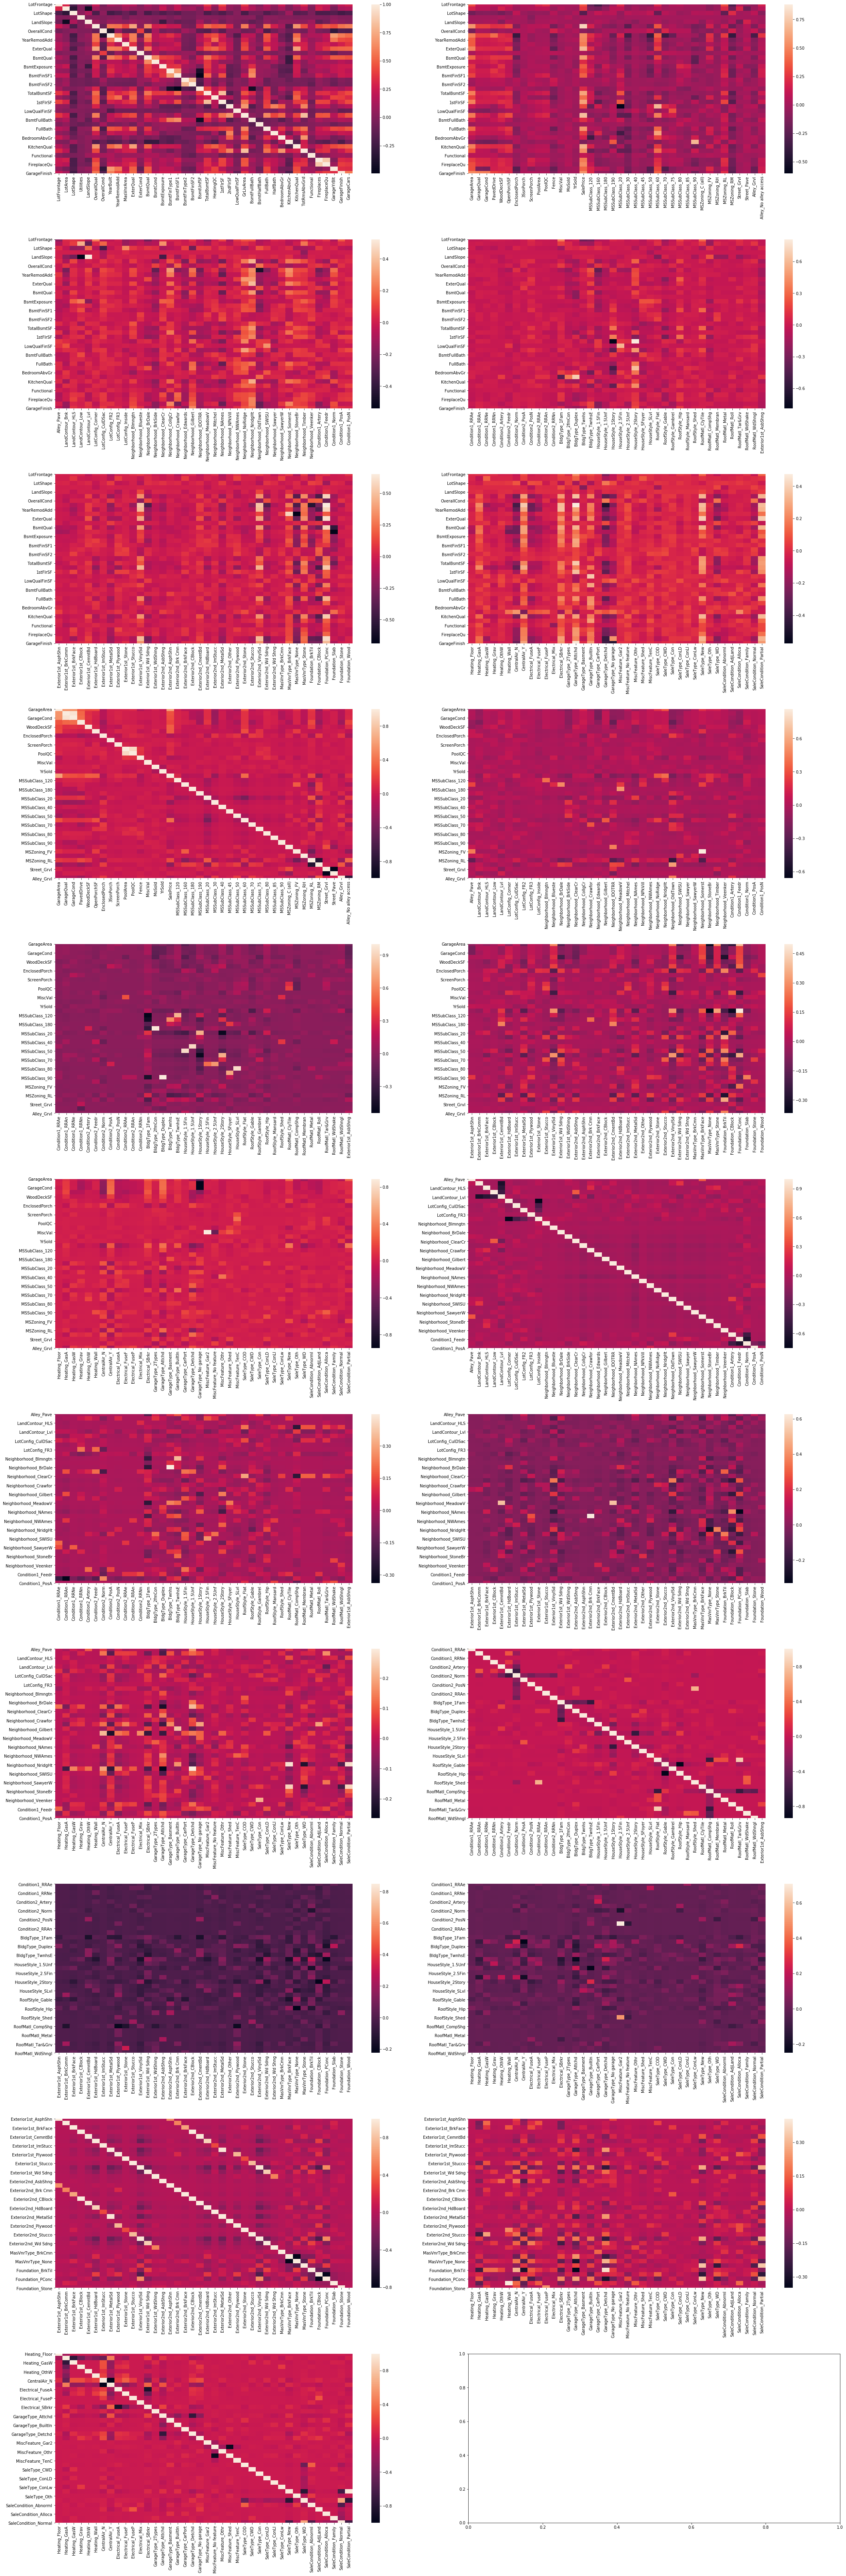

In [56]:
#поскольку переменных у нас великое множество, нужно разбить на несколько графиков. Корреляционную матрицу я поделю на куски 
fig, ax = plt.subplots(11, 2, figsize = (30, 90))
sns.heatmap(corr_matrix.iloc[0:40, 0:40], ax = ax[0,0])
sns.heatmap(corr_matrix.iloc[0:40, 40:80], ax = ax[0,1])
sns.heatmap(corr_matrix.iloc[0:40, 80:120], ax = ax[1,0])
sns.heatmap(corr_matrix.iloc[0:40, 120:160], ax = ax[1,1])
sns.heatmap(corr_matrix.iloc[0:40, 160:200], ax = ax[2,0])
sns.heatmap(corr_matrix.iloc[0:40, 200:240], ax = ax[2,1])
sns.heatmap(corr_matrix.iloc[40:80, 40:80], ax = ax[3,0])
sns.heatmap(corr_matrix.iloc[40:80, 80:120], ax = ax[3,1])
sns.heatmap(corr_matrix.iloc[40:80, 120:160], ax = ax[4,0])
sns.heatmap(corr_matrix.iloc[40:80, 160:200], ax = ax[4,1])
sns.heatmap(corr_matrix.iloc[40:80, 200:240], ax = ax[5,0])
sns.heatmap(corr_matrix.iloc[80:120, 80:120], ax = ax[5,1])
sns.heatmap(corr_matrix.iloc[80:120, 120:160], ax = ax[6,0])
sns.heatmap(corr_matrix.iloc[80:120, 160:200], ax = ax[6,1])
sns.heatmap(corr_matrix.iloc[80:120, 200:240], ax = ax[7,0])
sns.heatmap(corr_matrix.iloc[120:160, 120:160], ax = ax[7,1])
sns.heatmap(corr_matrix.iloc[120:160, 160:200], ax = ax[8,0])
sns.heatmap(corr_matrix.iloc[120:160, 200:240], ax = ax[8,1])
sns.heatmap(corr_matrix.iloc[160:200, 160:200], ax = ax[9,0])
sns.heatmap(corr_matrix.iloc[160:200, 200:240], ax = ax[9,1])
sns.heatmap(corr_matrix.iloc[200:240, 200:240], ax = ax[10,0])

fig.tight_layout(pad=3.0)
plt.show()

Так как переменных очень много, сказать что-то в целом не получится. Но можно заметить, что обычно корреляция между признаками не превышает 0.4 (по модулю), то есть является либо низкой, либо средней. Исключения есть: например, высокая положительная корреляция у признаков, которые описывают одну и ту же характеристику дома, как у переменных материала внешней отделки-1 и метариала внешней отделки-2 (то есть в случаях, когда материалов было использовано несколько) (см график на позиции 9,0). Также поскольку в датасете есть дамми по каким-то признакам, понятно, что между ними будет корреляция -1. 

## 5 (0.5 балла)

Найдите признаки с максимальным и минимальным **абсолютным** значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

*Не забудьте указать название графика и обозначить, что изображено по каждой из осей.*

In [57]:
corr_y = {x: np.abs(data["SalePrice"].corr(data[x])) for x in data.columns if x != "SalePrice"}

In [58]:
max(corr_y.values())

0.7910686627656216

In [59]:
min(corr_y.values())

0.00030671840752295146

In [60]:
list(corr_y.keys())[list(corr_y.values()).index(0.7910686627656216)] #переменная с максимальным абслютным значением корреляции

'OverallQual'

In [61]:
list(corr_y.keys())[list(corr_y.values()).index(0.00030671840752295146)] #переменная с минимальным абсолютным значением корреляции

'RoofMatl_Metal'

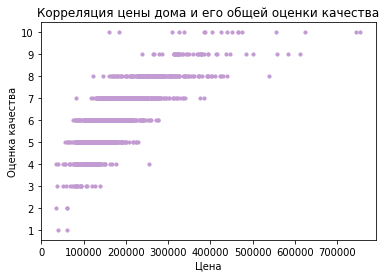

In [62]:
plt.scatter(data["SalePrice"], data["OverallQual"], s=10, color='#C39BD3') #поскольку OverallQual – порядковая переменная, лучше
#визуализировать через boxplot 
plt.title("Корреляция цены дома и его общей оценки качества")
plt.xlabel("Цена")
plt.ylabel("Оценка качества")
plt.yticks(np.arange(1, 11, 1))
plt.show();

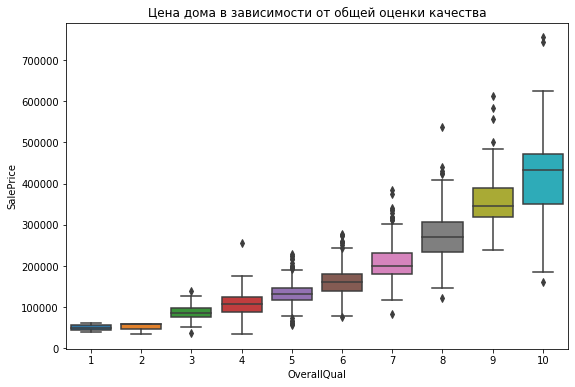

In [63]:
fig = plt.figure(figsize = (9, 6))
ax = sns.boxplot(data = data, x = "OverallQual", y = "SalePrice")
ax.set_title("Цена дома в зависимости от общей оценки качества");
#Видно, что медиана цены с увеличением оценки качества растет, но при этом увеличивается и разброс значений – при оценках выше 5
#наблюдаются выбросы, межквартильный размах растет

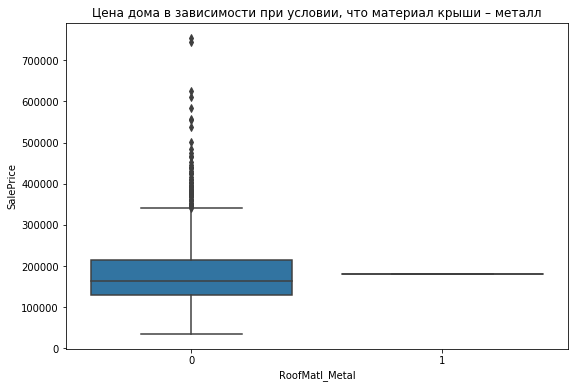

In [64]:
fig = plt.figure(figsize = (9, 6)) #поскольку RoofMatl_Metal – бинарная переменная, снова используем boxplot
ax = sns.boxplot(data = data, x = "RoofMatl_Metal", y = "SalePrice")
ax.set_title("Цена дома в зависимости при условии, что материал крыши – металл");
#Корреляции правда не заметно, судя по огромному количеству выбросов

In [65]:
sum(data["RoofMatl_Metal"] == 1) #похоже, в датасете всего один дом с полностью металлической крышей, что объясняет низкую корреляцию


1

## 6 (0.5 балла)

Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также «смещения» распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

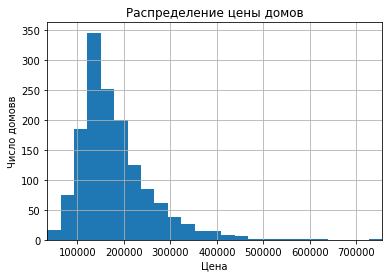

In [66]:
data.SalePrice.hist(bins = 25) #здест распределение скошенное 
plt.title("Распределение цены домов")
plt.xlabel("Цена")
plt.ylabel("Число домовв")
plt.margins(x = 0)
plt.show()

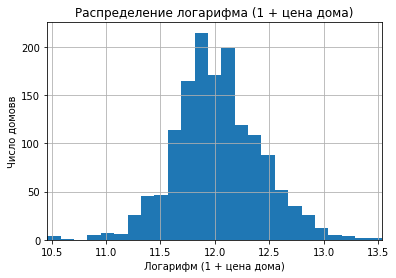

In [67]:
plt.hist(np.log1p(data["SalePrice"]), bins = 25) #а здесь уже очень похоже на нормальное. Нормализация данных нужна, чтобы 
#скорректировать масштаб данных + с нормальным распределением линейные модели как правило лучше работают
plt.title("Распределение логарифма (1 + цена дома)")
plt.xlabel("Логарифм (1 + цена дома)")
plt.ylabel("Число домовв")
plt.margins(x = 0)
plt.grid()
plt.show()

In [68]:
np.log1p(data["SalePrice"])

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1459, dtype: float64

Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль.

*Пожалуйста, **не меняйте** значение `random_state` в следующей ячейке.*

In [69]:
X_train, X_val, y_train, y_val = train_test_split(data.drop('SalePrice', axis=1),
                                                  np.log1p(data['SalePrice']), random_state=17032019)

In [70]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1094, 239), (365, 239), (1094,), (365,))

## 7 (2 балла)

Примените к данным следующие алгоритмы:

- kNN
- линейная регрессия
- Lasso
- Ridge

(Если вдруг забыли что такое Lasso и Ridge - https://habr.com/ru/post/328760/)

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрике **Root** Mean Squared Error. Какой из методов показывает себя лучше?

In [71]:
k_range = np.arange(1, 40)
k_scores = []

for k in k_range:
    knn1 = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn1, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    k_scores.append(-scores.mean())

In [72]:
min(k_scores)

0.05307739252154233

In [73]:
k_scores.index(min(k_scores)) #так как индексация идет с 0, лучшее k = 7 

6

In [74]:
knn2 = KNeighborsRegressor() #попробуем подобрать помимо числа соседей еще метрику подсчета и веса
weight_options = ['uniform', 'distance']
param_grid = {"n_neighbors": k_range, "weights": weight_options, "metric": ["euclidean", "manhattan"]}
knn_gscv = GridSearchCV(knn2, param_grid, cv=5, scoring = "neg_mean_squared_error")
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [75]:
knn_gscv.best_params_ #лучше всего 8 соседей, манхэттенская метрика, веса по расстояниям

{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}

In [97]:
knn_fin = KNeighborsRegressor(n_neighbors=8, weights = "distance", metric = "manhattan")
knn_fin.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='distance')

In [98]:
np.sqrt(mean_squared_error(knn_fin.predict(X_val), y_val)) #ошибка на валидационной выборке – 0.1975

0.19757401479841735

In [78]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
np.sqrt(mean_squared_error(lr.predict(X_val), y_val)) #линейная регрессия предсказывает лучше, чем KNN (у OLS регрессии нет гиперпараметров
#так что кросс-валидации тут не было)


0.1580409325076201

In [80]:
alphas = np.linspace(0.0001, 50,1000)

In [81]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

11.461538538538537

In [82]:
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_val, ridge.predict(X_val))) #Ошибка по ридж – 0.1237

0.12377208032619791

In [83]:
alphas = np.linspace(0.0001, 1, 1000)

In [84]:
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 1200)
lassocv.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-04, 1.10090090e-03, 2.10180180e-03, 3.10270270e-03,
       4.10360360e-03, 5.10450450e-03, 6.10540541e-03, 7.10630631e-03,
       8.10720721e-03, 9.10810811e-03, 1.01090090e-02, 1.11099099e-02,
       1.21108108e-02, 1.31117117e-02, 1.41126126e-02, 1.51135135e-02,
       1.61144144e-02, 1.71153153e-02, 1.81162162e-02, 1.91171171e-02,
       2.01180180e-02, 2.11189189e-0...
       9.88990090e-01, 9.89990991e-01, 9.90991892e-01, 9.91992793e-01,
       9.92993694e-01, 9.93994595e-01, 9.94995495e-01, 9.95996396e-01,
       9.96997297e-01, 9.97998198e-01, 9.98999099e-01, 1.00000000e+00]),
        copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=1200,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [85]:
lassocv.alpha_ 

0.001100900900900901

In [86]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_val, lasso.predict(X_val))) #ошибка на лассо – 0.1208

0.12083691143939282

Лучше всего в итоге предсказывает лассо регрессия (возможно, это связано с тем, что в датасете много признаков, и обнуление наиболее 
"бесполезных" из них дает хороший результат). 

## 8 (0.5 балла)

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

In [87]:
lin_coefs = lr.coef_

In [88]:
len(lin_coefs)

239

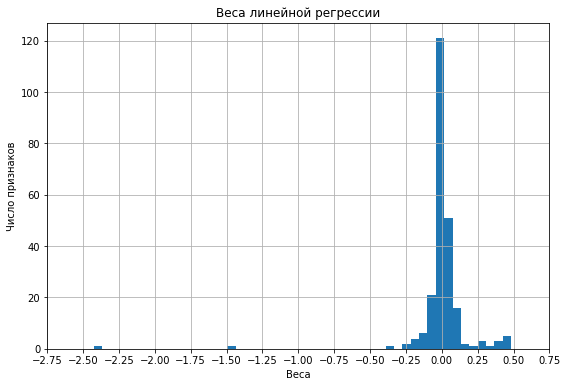

In [89]:
fig = plt.figure(figsize = (9, 6))
plt.hist(lin_coefs, bins = 50)
plt.title("Веса линейной регрессии")
plt.xlabel("Веса")
plt.ylabel("Число признаков")
plt.xticks(np.arange(-2.75, 1, 0.25))
plt.grid()
plt.show() #есть несколько странных выбросов в сильно отрицательных значениях, так как обычная регрессия не штрафует за слишком 
#"отклоняющиеся" веса

In [90]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients.columns = ["features", "coefs"]
coefficients.sort_values(["coefs"], ascending = False) #собственно, это RoofMatl_ClyTile – тип покрытий крыши, и 
#Condition2_PosN - близость к паркам, лесополосе и тд

,features,coefs
153,RoofMatl_Metal,0.481877
157,RoofMatl_WdShngl,0.476794
126,Condition2_PosA,0.452169
155,RoofMatl_Tar&Grv,0.447868
149,RoofStyle_Shed,0.433204
...,...,...
70,MSZoning_C (all),-0.267674
223,MiscFeature_TenC,-0.272553
160,Exterior1st_BrkComm,-0.359732
127,Condition2_PosN,-1.447815


In [91]:
lasso_coefs = lasso.coef_

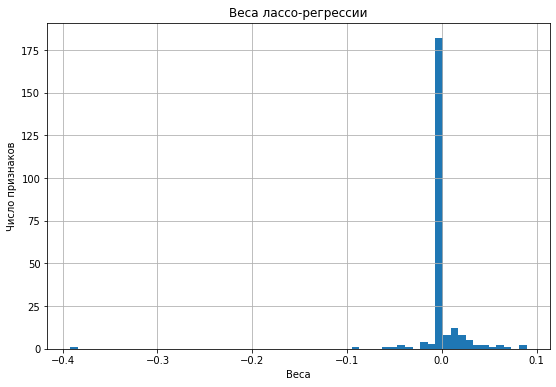

In [92]:
fig = plt.figure(figsize = (9, 6)) #как видно, абсолютное большинство весов имеют очень низкую величину по модулю и "прижаты" к 0
plt.hist(lasso_coefs, bins = 60)
plt.title("Веса лассо-регрессии")
plt.xlabel("Веса")
plt.ylabel("Число признаков")
plt.grid()
plt.show()

In [93]:
coefficients_l = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(lasso.coef_))], axis = 1)
coefficients_l.columns = ["features", "coefs"]
coefficients_l.sort_values(["coefs"], ascending = False) #снова сильно отклоняется RoofMatl_ClyTile

,features,coefs
105,Neighborhood_NridgHt,0.089655
95,Neighborhood_Crawfor,0.088552
111,Neighborhood_StoneBr,0.070471
110,Neighborhood_Somerst,0.061674
161,Exterior1st_BrkFace,0.058573
...,...,...
74,MSZoning_RM,-0.040856
96,Neighborhood_Edwards,-0.050503
80,LandContour_Bnk,-0.060320
70,MSZoning_C (all),-0.094804


In [94]:
sum(coefficients_l["coefs"] == 0) #как видно, лассо обнулила большую часть признаков в датасете, полсчитав их избыточными. 
#Поэтому такой огромный "столбик" значений сосредоточен в нуле

153

In [95]:
ridge_coefs = ridge.coef_

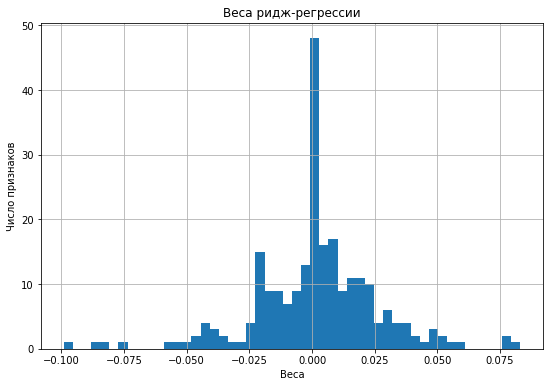

In [96]:
fig = plt.figure(figsize = (9, 6)) #здесь веса тоже сконцентрированы около 0, и это единственный график без выбросов 
#(хороший штраф на большие коэффициенты). К тому же, ридж призвана бороться со случаями избыточности данных и мультиколинероностью
#а у нас в данных точно мултиколинеарность есть, так как некоторые признаки сильно между собой связаны (см. heatmap)) 
plt.hist(ridge_coefs, bins = 50)
plt.title("Веса ридж-регрессии")
plt.xlabel("Веса")
plt.ylabel("Число признаков")
plt.grid()
plt.show()

## 9 (0.5 балла)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.125 на тестовых данных по метрике RMSE (если вы дошли до этого задания, а качество выше уже удовлетворяет этому условию, вы автоматически получите за него полный балл).

In [ ]:
# реализовано в лассо

## 10* (1 балл)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.121 на тестовых данных по метрике RMSE. Для этого вы можете использовать самые разные методы, какие захотите - отбор признаков, генерация новых, разные способы предобработки данных. Единственное ограничение - не использовать никакие алгоритмы регрессии, кроме kNN, линейной регрессии, Lasso и Ridge.

In [ ]:
# тоже реализовано в лассо

# Теория (бонусная часть)

За данную часть можно получить бонусные баллы. Решения необходимо оформить в этом же файле в ячейках типа Markdown, пользуясь $\LaTeX$ для записи математических формул.

## 1* (0.5)

Вычислите производную сигмоидной функции

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

и выразите ее через $\sigma(x)$.

*(your solution here)*

## 2* (0.5)

Найдите константу $C$, решающую следующую задачу ($0 < \tau < 1$ фиксировано):

$$
\sum\limits_{i=1}^\ell\rho_\tau\left(y_i - C\right) \to \min_C,
$$

где

$$
\rho_\tau(z) =
\begin{cases}
\tau z, & z > 0\\
(\tau - 1)z, & z \leq 0
\end{cases}
$$

Вам может показаться полезной эта ссылка https://medium.com/@gennadylaptev/median-and-mae-3e85f92df2d7

*(your solution here)*